In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [72]:
df=pd.read_csv("advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [73]:
df.shape

(200, 4)

In [74]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [75]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [77]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [78]:
X=df.iloc[:,0:3]
Y=df.iloc[:,3]

In [79]:
X.head(2)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


In [80]:
Y.head(3)

0    22.1
1    10.4
2    12.0
Name: Sales, dtype: float64

In [81]:
from sklearn.preprocessing import StandardScaler


In [82]:
from sklearn.compose import make_column_transformer
transform_x=make_column_transformer((StandardScaler(),['TV', 'Radio', 'Newspaper']), remainder = 'passthrough')

In [83]:
X=transform_x.fit_transform(X)
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [84]:
# Y = np.array([Y])

# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Fit and transform your data
# Y_scale = scaler.fit_transform(Y)

In [85]:
X.shape

(200, 3)

In [86]:
Y.shape

(200,)

In [87]:
train_x, test_x , train_y, test_y=train_test_split(X,Y,test_size=0.2, random_state=42)

In [88]:
model=LinearRegression()

In [89]:
model.fit(train_x,train_y)

LinearRegression()

In [90]:
y_pred=model.predict(test_x)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [91]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(test_y, y_pred)

In [92]:
mse

2.9077569102710936

In [93]:
r2 = r2_score(test_y, y_pred)

In [94]:
r2

0.9059011844150825

In [95]:

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 2.91
R-squared: 0.91


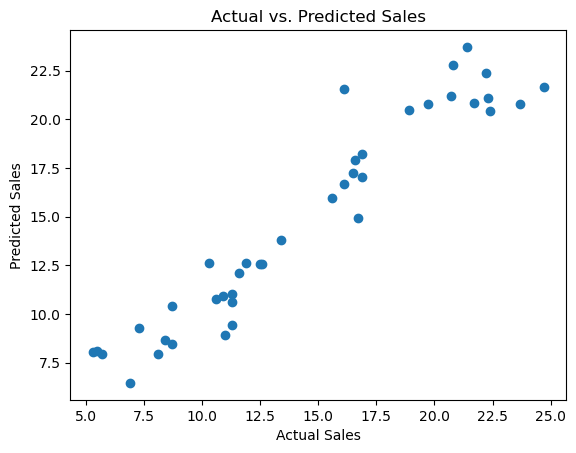

In [96]:
plt.scatter(test_y, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales")
plt.show()

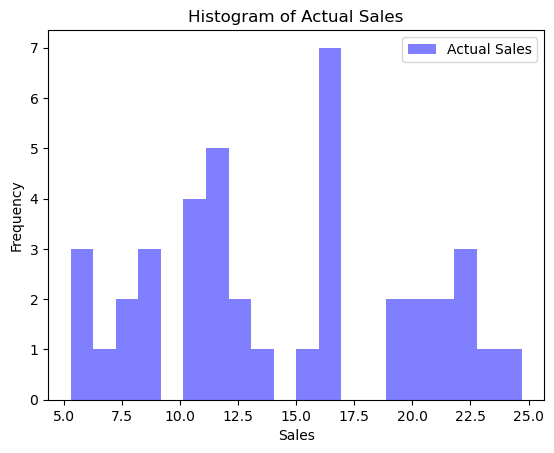

In [97]:
# Create a histogram for actual sales (test_y)
plt.hist(test_y, bins=20, color='blue', alpha=0.5, label='Actual Sales')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Actual Sales")
plt.legend()
plt.show()

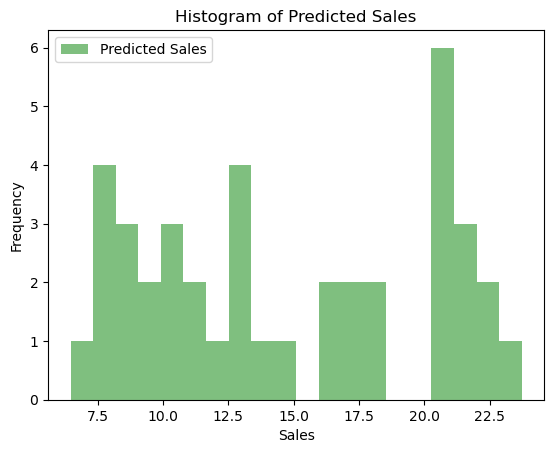

In [98]:
# Create a histogram for predicted sales (y_pred)
plt.hist(y_pred, bins=20, color='green', alpha=0.5, label='Predicted Sales')
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Sales")
plt.legend()
plt.show()

In [101]:
new_data = pd.DataFrame({
    'TV': [190.2],
    'Radio': [11.1],
    'Newspaper': [58.2]
})


predicted_sales = model.predict(new_data)
print(f'Predicted Sales: {predicted_sales[0]}')

Predicted Sales: 925.1670796478178


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
